In [5]:
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt


In [10]:
# Import digit data set from sklearn
from sklearn.datasets import load_digits
digits = load_digits()

In [9]:
# properties of data set
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

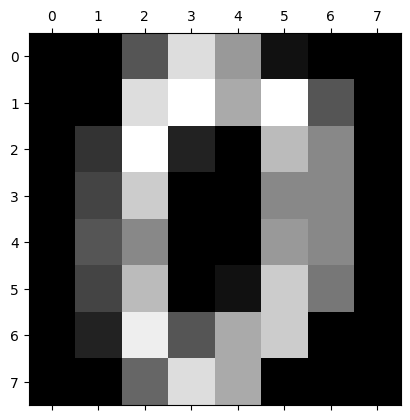

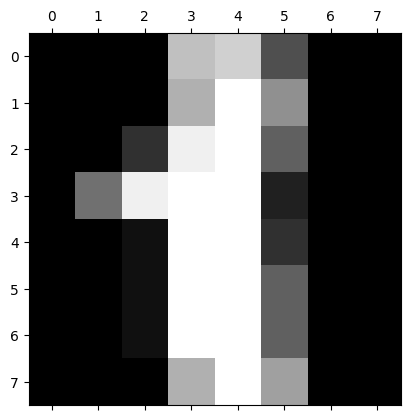

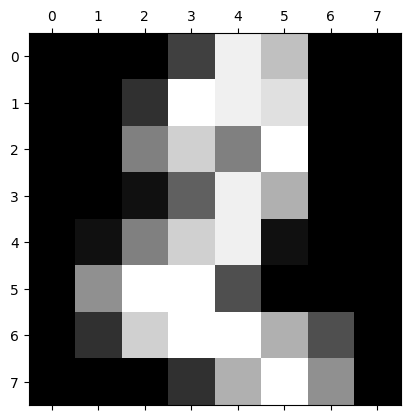

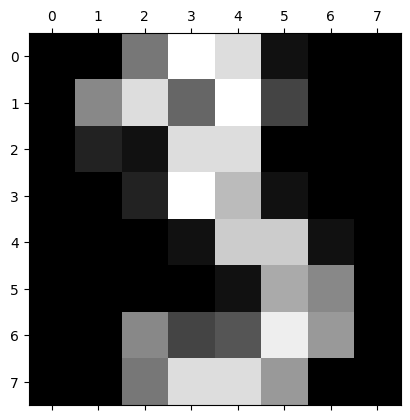

In [15]:
#Visualize
for i in range(4):
  plt.matshow(digits.images[i])

In [17]:
# Creating pandas data frame to evaluate
#it is easy in df rather than normal matrix

df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [18]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [21]:
df['target'] = digits.target
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,targrt,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1,1


In [22]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'], axis ='columns'),digits.target ,test_size=0.2)

In [23]:
X_train.head(2)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,targrt
1606,0.0,0.0,8.0,16.0,16.0,13.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,3
1408,0.0,0.0,0.0,2.0,14.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,15.0,6.0,0.0,0.0,4


In [60]:
#Converting dataframe column names to string

X_train.columns = X_train.columns.astype(str)

X_test.columns = X_test.columns.astype(str)

In [28]:
X_train.shape

(1437, 65)

In [25]:
y_train[:5]

array([3, 4, 1, 5, 3])

In [26]:
len(y_train)

1437

In [27]:
len(y_test)

360

**Using Randomforest classifire**

In [63]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=None)

In [64]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [66]:
model.score(X_test,y_test)

0.9916666666666667

In [69]:
# Plotting Confusion matrix

y_predict = model.predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_test,y_predict)
cn

array([[41,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 34,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 28,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2, 37]])

Text(95.72222222222221, 0.5, 'Truth')

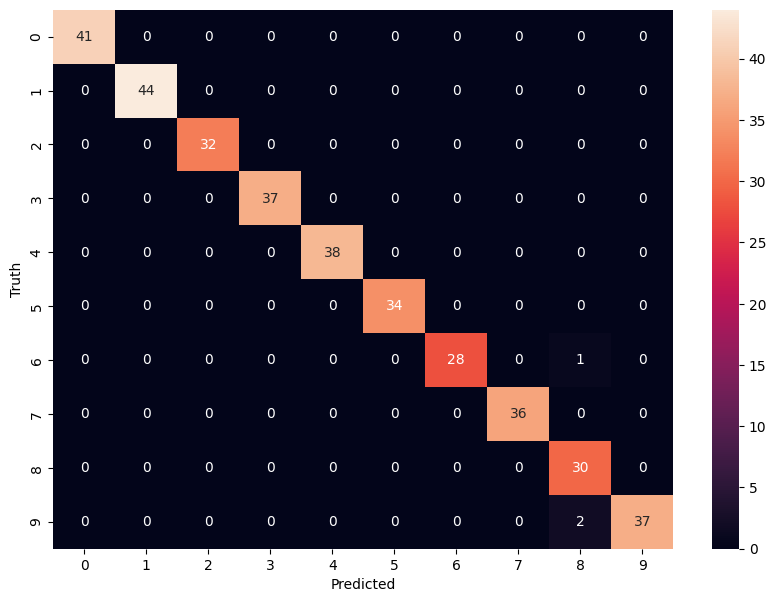

In [73]:
import seaborn as sn
plt.figure(figsize =(10,7))
sn.heatmap(cn, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')